# WeRateDogs - Data Wrangling and Analysis

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
from timeit import default_timer as timer
import warnings

# WeRateDogs Twitter archive

In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')


In [3]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
df.shape

(2356, 17)

# The tweet image predictions

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')

In [8]:
image_predictions_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


To check for duplicated tweet_id ->

In [9]:
df.tweet_id.duplicated().sum()

0

In [10]:
image_predictions_df.tweet_id.duplicated().sum()

0

# Tweet's JSON data

In [68]:
consumer_key = '7hpsXEwxla9tyRqYlJh7RHPZW'
consumer_secret = 'OjJBNj0wgTr2qo2iICobIo9HkjkYX5omtmXtULRnYP5LHv6uJR'
access_token = '1212695400697610240-xnUNteTR8Cna9OLl7XF2K9kxD1OI0D'
access_secret = 'r2IBzs3zD2eO7IYba6ZDNzmtN3Q8HIWeW3KDrAtioRIFu'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [69]:
api

In [70]:
tweet_ids = list(df.tweet_id)
tdata = {}
fdict = {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tdata[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))
        fdict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fdict) 

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Error for: 754011816964026368
Error for: 680055455951884288
3017.0692556000004
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '872668790621863937': TweepError([{'code

The number of tweet_id which are not present in the website of twitter ->

In [71]:
len (fdict)

25

In [73]:
len(tdata)

2331

To write the data obtained in a text file ->

In [74]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tdata, file)

Writing the test to json file ->

In [75]:
with open('tweet_json.txt') as file:
    data = json.load(file)

In [76]:
tweets_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_list.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })
    
tweets_df = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])

In [77]:
tweets_df.head(2)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7724,36281,8779938,16
1,892177421306343426,5711,31272,8779938,16


In [78]:
tweets_df.tweet_id.duplicated().sum() #to check for duplicated value

0

### Complete data

* df -> dataset "twitter-archive-enhanced.csv" which was converted into a dataframe and gives information on basic tweet data
* image_predictions_df ->  information about predictions about the image
* tweets_df -> dataset will contain information like tweet_id, no of retweets and no of favorites etc

# Assessing the data

Assessing df -> 

In [79]:
df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [80]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Detailed description of the column data can be obtained from here -> https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html

In [81]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [83]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [84]:
df.tweet_id.duplicated().sum()

0

In [85]:
df[df['name'] == 'officially']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None


In [86]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [87]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [88]:
df[df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [89]:
dog_names = []
dog_names = df['name'].unique()
dog_names.sort()

In [90]:
dog_names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

### Quality Issues
* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls have missing values.
* 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very' -> inappropriate names for dogs
* Missing values in doggo, floofer, pupper , puppo are None instead of NaN
* Information of text is truncated to 50 characters.
* timestamp and retweeted_status_timestamp must be of datetime
* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id must be integers
* rating_numerator and rating_denominator have some incosistent values in the numerator and denominator
* tweet id 835246439529840640 has a rating of denominator = 0

### Tidiness Issues
* We need to join all dataframes to get a final dataframe because some columns are present in more than 1 table.
* Dog stages are found in multiple columns.

Assesing tweets_df - >

In [91]:
tweets_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7724,36281,8779938,16
1,892177421306343426,5711,31272,8779938,16
2,891815181378084864,3786,23543,8779938,16
3,891689557279858688,7870,39552,8779938,16
4,891327558926688256,8496,37761,8779938,16


In [92]:
tweets_df.columns

Index(['tweet_id', 'retweets', 'favorites', 'followers', 'friends'], dtype='object')

In [93]:
tweets_df.describe()

,retweets,favorites,followers,friends
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,2709.460317,7573.655084,8.779965e+06,16.0
std,4582.082775,11753.262997,7.096430e+01,0.0
min,1.000000,0.000000,8.779374e+06,16.0
25%,548.500000,1320.500000,8.779950e+06,16.0
50%,1271.000000,3298.000000,8.779972e+06,16.0
75%,3148.000000,9271.000000,8.779992e+06,16.0
max,77979.000000,156469.000000,8.780009e+06,16.0


In [94]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
 3   followers  2331 non-null   int64 
 4   friends    2331 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [95]:
tweets_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

### Quality Issues 
* 14 tweet id information is missing

### Tidiness Issues
* Retweets and favourites must join with the df table

Assessing image_predictions_df ->

In [96]:
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [97]:
image_predictions_df.shape

(2075, 12)

In [98]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Explanation 

* p1: p1 is the algorithm's #1 prediction for the image in the tweet
* p1_conf: p1_conf is how confident the algorithm is in its #1 prediction
* p1_dog: p1_dog is whether or not the #1 prediction is a breed of dog
* p2: is the algorithm's second most likely prediction
* p2_conf: is how confident the algorithm is in its #2 prediction
* p2_dog: is whether or not the #2 prediction is a breed of dog
* p3: p3 is the algorithm's #3 prediction for the image in the tweet
* p3_conf: p3_conf is how confident the algorithm is in its #3 prediction
* p3_dog: p3_dog is whether or not the #3 prediction is a breed of dog

In [99]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [100]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality Issues
* only 2075 tweetIds have images

### Tidiness Issues
* All the prediction outputs from different algorithms have to be joined with df, becuase all the information is already found there.

# Cleaning Data

Creation of copy of dataframes ->

In [101]:
df.shape

(2356, 17)

In [128]:
df_clean = df.copy()
tweets_clean = tweets_df.copy()
img_clean = image_predictions_df.copy()

In [129]:
df_clean.shape

(2356, 17)

In [130]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [131]:
df_clean.shape

(2356, 17)

In [132]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
 3   followers  2331 non-null   int64 
 4   friends    2331 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [133]:
df.shape

(2356, 17)

In [134]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Convert data type of tweet id to string ->

In [135]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
img_clean['tweet_id'] = img_clean['tweet_id'].astype(str)

In [136]:
df_clean.shape

(2356, 17)

In [137]:
df_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [138]:
img_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Creation of a dataset by combining all the 3 tables on the basis of tweet id ->

In [139]:
df_clean.shape

(2356, 17)

In [140]:
df_clean=pd.merge(df_clean,tweets_clean,how="inner",on='tweet_id')

In [141]:
tweets_df.shape

(2331, 5)

In [142]:
df_clean.shape

(2331, 21)

In [143]:
df_clean=pd.merge(df_clean,img_clean,how="inner",on='tweet_id')

In [144]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [145]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [146]:
df_clean.shape

(2059, 32)

In [147]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

Make dog stage and dog category as 1 column ->

In [148]:
df_clean = pd.melt(df_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                           'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')

In [149]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None
8232,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None
8233,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None
8234,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None


In [150]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()] #removing retweet data 

In [151]:
df_clean.drop(['variable'], axis=1,inplace= True)

C:\Users\Samriddhi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [152]:
df_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
4227,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,...,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,0.061314,True,None
4243,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,...,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False,None
3276,695051054296211456,NaN,NaN,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695051054...,...,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True,None


In [153]:
df_clean = df_clean.drop_duplicates()

In [154]:
df_clean.shape

(2303, 29)

In [155]:
df_clean.tweet_id.duplicated().sum()

316

There are 331 duplicated rows becuase the count has increased. These duplicated rows might have occured due to multiple tagging done with dog_stage. 

In [156]:
df_clean.dog_stage.value_counts()

None       1987
pupper      212
doggo        73
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [157]:
tweet_dog_stage = df_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 

In [158]:
tweet_dog_stage.shape

(2303, 29)

In [159]:
tweet_dog_stage_1 = tweet_dog_stage[tweet_dog_stage['dog_stage'] != 'None']

In [160]:
tweet_dog_stage_1.shape

(316, 29)

In [161]:
tweet_dog_stage_1['tweet_id'].value_counts()

759793422261743616    2
733109485275860992    2
854010172552949760    2
801115127852503040    2
741067306818797568    2
                     ..
688519176466644993    1
732375214819057664    1
705428427625635840    1
707411934438625280    1
773985732834758656    1
Name: tweet_id, Length: 305, dtype: int64

In [162]:
tweet_dog_stage_1[tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
357,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4475,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [163]:
#to check if text can help
tweet_dog_stage_1[tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

357     This is Dido. She's playing the lead role in "...
4475    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

In [164]:
bool_series = tweet_dog_stage_1["tweet_id"].duplicated(keep = False) #to make a bool series to keep the unique values

In [165]:
tweet_dog_stage_1 = tweet_dog_stage_1[~bool_series] 

In [166]:
tweet_dog_stage_1.shape

(294, 29)

In [167]:
tweet_dog_stage_1.tweet_id.duplicated().sum() #to check for duplicate values

0

In [168]:
tweet_dog_stage_2 = tweet_dog_stage_1.drop_duplicates(subset=['tweet_id']) 

In [169]:
tweet_dog_stage_2.shape

(294, 29)

In [170]:
#combine to get all unique values
df1 = tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
df_merged = df1.append(tweet_dog_stage_2)
df_merged.shape

(1976, 29)

### Test

In [171]:
df_merged.tweet_id.duplicated().sum() #cross check for duplicates

0

In [172]:
df_merged.dog_stage.value_counts()

None       1682
pupper      203
doggo        62
puppo        22
floofer       7
Name: dog_stage, dtype: int64

In [173]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 7053
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1976 non-null   object 
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   1976 non-null   object 
 4   source                      1976 non-null   object 
 5   text                        1976 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1976 non-null   object 
 10  rating_numerator            1976 non-null   int64  
 11  rating_denominator          1976 non-null   int64  
 12  name                        1976 non-null   object 
 13  retweets                    1976 

In [174]:
df_clean = df_merged.copy()

### DEFINE 

To convert in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id to string

### Code

In [175]:
df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.astype(str)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.astype(str)
df_clean.retweeted_status_id = df_clean.retweeted_status_id.astype(str)
df_clean.retweeted_status_user_id = df_clean.retweeted_status_user_id.astype(str)

### Test

In [176]:
df_clean.dtypes

tweet_id                       object
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
source                         object
text                           object
retweeted_status_id            object
retweeted_status_user_id       object
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
retweets                        int64
favorites                       int64
followers                       int64
friends                         int64
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf     

### Define

Convert required variables to date time format

### Code

In [177]:
df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp) 
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

### Test

In [178]:
df_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp         datetime64[ns]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
retweets                                    int64
favorites                                   int64
followers                                   int64
friends                                     int64
jpg_url                                    object
img_num                                     int64
p1                                         object


### Define
Increase the text format representation

### Code

In [179]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Samriddhi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


### Test

In [180]:
df_clean.text[df_clean.name =='infuriating']

1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [181]:
df_clean[df_clean.name =='light']['text']

1709    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

### DEFINE
Set appropriate names for dogs with weird names by seeing the text information

### Code

In [182]:
l = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']

for w in l:
    print(df_clean.text[df_clean.name == w])

1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1727    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5332    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
Series([], Name: text, dtype: object)
1709    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object
Series([], Name: text, dtype: object)
679    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
Name: text, dtype: object
797    What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX
Name: text, dtype: object
1470    This is officially the greatest yawn of all time. 12/10 

We observed that it is impossible to get the dog names from the text. We can put a none value for all inappropriate names.

### Test

In [183]:
for w in l:    
     df_clean.name[df_clean.name == w] = 'None' 

C:\Users\Samriddhi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [184]:
df_clean.name.value_counts()

None        630
Cooper      10 
Charlie     10 
Oliver      10 
Tucker      9  
           ..  
Dale        1  
Monty       1  
Jessifer    1  
Bloop       1  
Cedrick     1  
Name: name, Length: 915, dtype: int64

### Define
rating_numerator and rating_denominator have some incosistent values in the numerator and denominator. The rating for denominator is shown as 0 in a tweet. But since it is not possible to correct the ratings with the provided data, I have left them unaltered.

In [185]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 7053
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1976 non-null   object             
 1   in_reply_to_status_id       1976 non-null   object             
 2   in_reply_to_user_id         1976 non-null   object             
 3   timestamp                   1976 non-null   datetime64[ns, UTC]
 4   source                      1976 non-null   object             
 5   text                        1976 non-null   object             
 6   retweeted_status_id         1976 non-null   object             
 7   retweeted_status_user_id    1976 non-null   object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               1976 non-null   object             
 10  rating_numerator            1976 non-null   int64           

### Define
retweeted_status_timestamp has the null values

### Code

In [186]:
#the importance of this variable for the analysis is not significant. Hence, it is removed.
df_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

### Test

In [187]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 7053
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1976 non-null   object             
 1   in_reply_to_status_id     1976 non-null   object             
 2   in_reply_to_user_id       1976 non-null   object             
 3   timestamp                 1976 non-null   datetime64[ns, UTC]
 4   source                    1976 non-null   object             
 5   text                      1976 non-null   object             
 6   retweeted_status_id       1976 non-null   object             
 7   retweeted_status_user_id  1976 non-null   object             
 8   expanded_urls             1976 non-null   object             
 9   rating_numerator          1976 non-null   int64              
 10  rating_denominator        1976 non-null   int64              
 11  name             

### Storing the clean and merged file for further analysis

In [188]:
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing and Visualization

In [189]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Freq distribution of Retweets')]

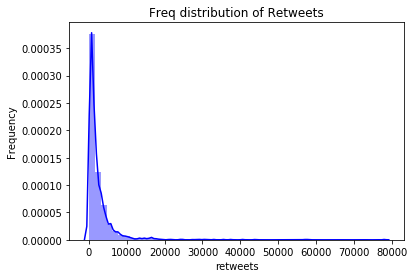

In [190]:
sns.distplot(df_clean['retweets'], color = 'blue').set(title = 'Freq distribution of Retweets', ylabel="Frequency")

Text(0, 0.5, 'Frequency')

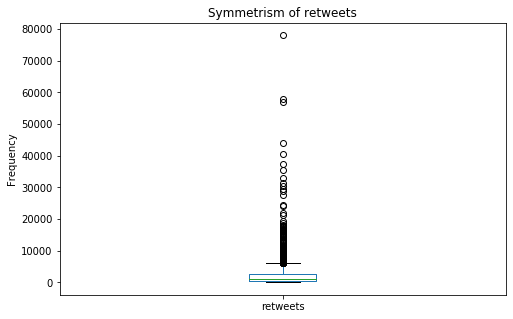

In [191]:
df_clean['retweets'].plot.box(figsize=(8,5))
plt.title('Symmetrism of retweets')
plt.ylabel('Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Freq distribution of Favourites')]

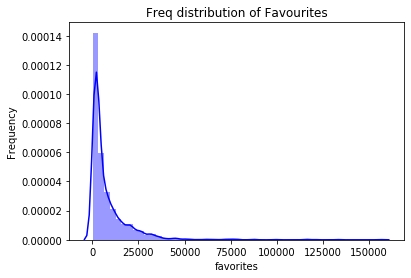

In [192]:
sns.distplot(df_clean['favorites'], color = 'blue').set(title = 'Freq distribution of Favourites', ylabel="Frequency")

Text(0, 0.5, 'Frequency')

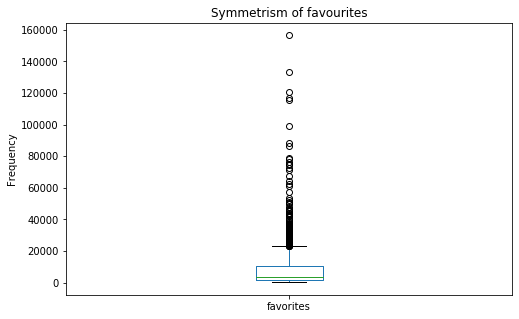

In [193]:
df_clean['favorites'].plot.box(figsize=(8,5))
plt.title('Symmetrism of favourites')
plt.ylabel('Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Freq distribution of Followers')]

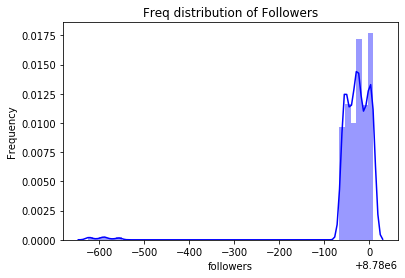

In [194]:
sns.distplot(df_clean['followers'], color = 'blue').set(title = 'Freq distribution of Followers', ylabel="Frequency")

Text(0, 0.5, 'Frequency')

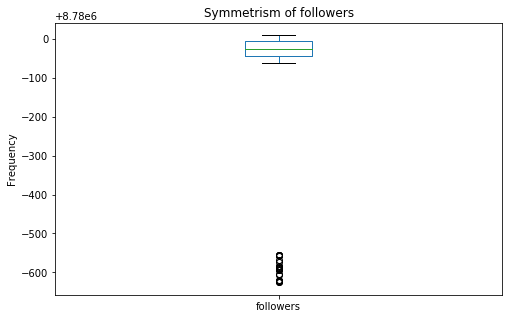

In [195]:
df_clean['followers'].plot.box(figsize=(8,5))
plt.title('Symmetrism of followers')
plt.ylabel('Frequency')

C:\Users\Samriddhi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Freq distribution of friends')]

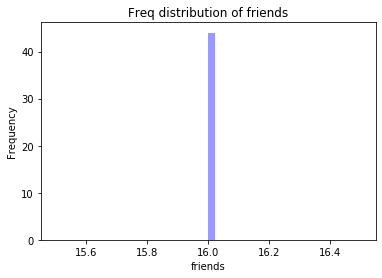

In [196]:
sns.distplot(df_clean['friends'], color = 'blue').set(title = 'Freq distribution of friends', ylabel="Frequency")

Text(0, 0.5, 'Frequency')

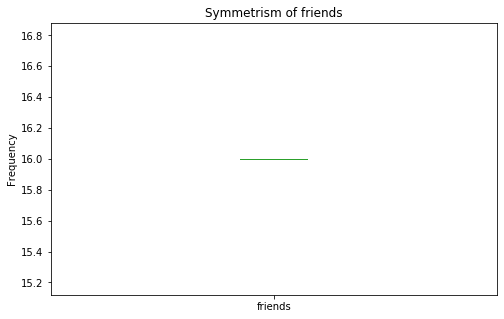

In [197]:
df_clean['friends'].plot.box(figsize=(8,5))
plt.title('Symmetrism of friends')
plt.ylabel('Frequency')

In [198]:
df_clean['favorites_mod'] = df_clean.favorites[df_clean.favorites <= 0] = 1
df_clean['retweets_mod'] = df_clean.retweets[df_clean.retweets <= 0] = 1

C:\Users\Samriddhi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Samriddhi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 432x288 with 0 Axes>

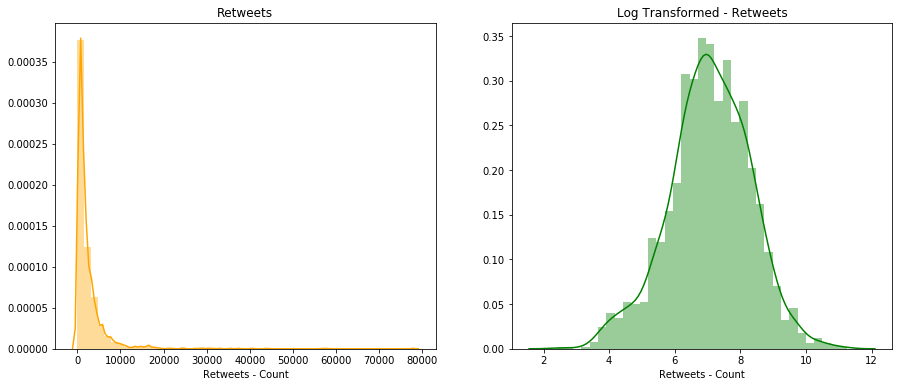

In [199]:
plt.figure(1)
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df_clean.retweets, color = 'orange')
plt.title('Retweets')
plt.xlabel('Retweets - Count')


plt.subplot(122)
sns.distplot(df_clean.retweets.apply(np.log), color = 'green')
plt.title('Log Transformed - Retweets')
plt.xlabel('Retweets - Count')

plt.show()

<Figure size 432x288 with 0 Axes>

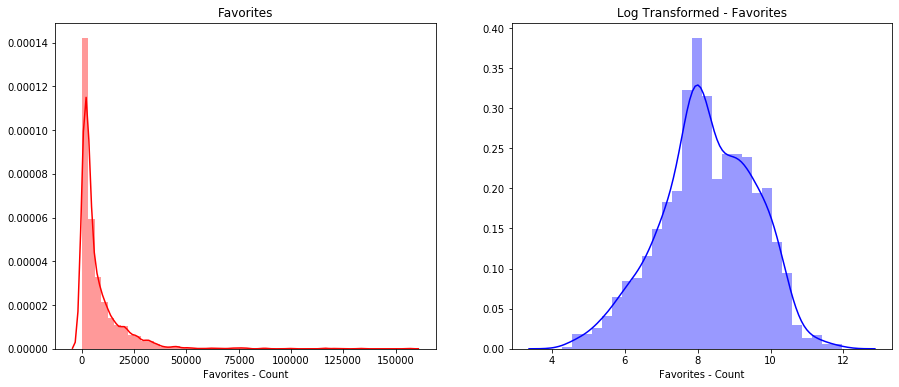

In [200]:
plt.figure(1)
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df_clean.favorites, color = 'red')
plt.title('Favorites')
plt.xlabel('Favorites - Count')


plt.subplot(122)
sns.distplot(df_clean.favorites.apply(np.log), color = 'blue')
plt.title('Log Transformed - Favorites')
plt.xlabel('Favorites - Count')

plt.show()

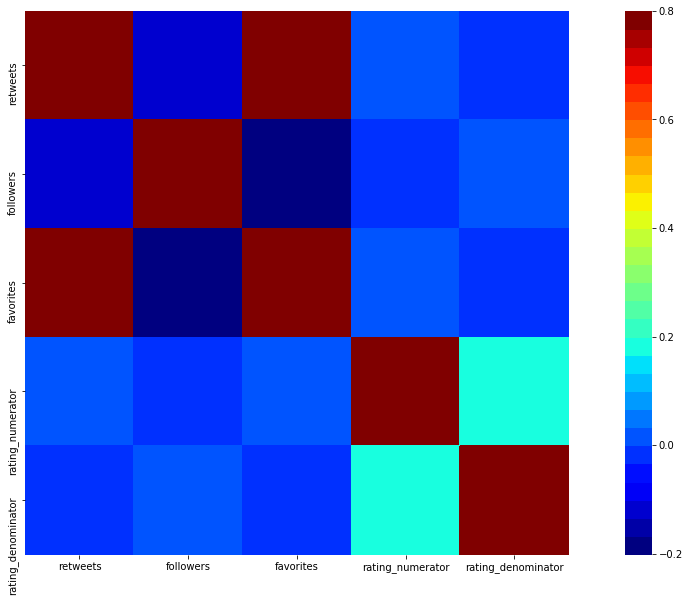

In [201]:
# Correlation between numerical variables
from matplotlib import cm as cm
num = (df_clean[['retweets', 'followers', 'favorites','rating_numerator', 'rating_denominator' ]])
mat = num.corr()
f, ax = plt.subplots(figsize=(20, 10))
c1 = cm.get_cmap('jet', 30)
sns.heatmap(mat, vmax=.8, square=True, cmap=c1);

It seems like Retweets and Favorites are highly correlated which means the people who retweeted have also tagged as favourites.

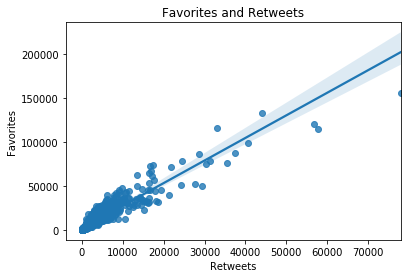

In [202]:
graph = sns.regplot(x=df_clean.retweets, y=df_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
fig = graph.get_figure()
fig.savefig('fav_retweet_scatter.png')

We can see that favourites and retweets go together.

In [203]:
def plot_algo(p):
    df_clean[p].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
    plt.title(p+' Algorithm Output')
    plt.ylabel('Count %')


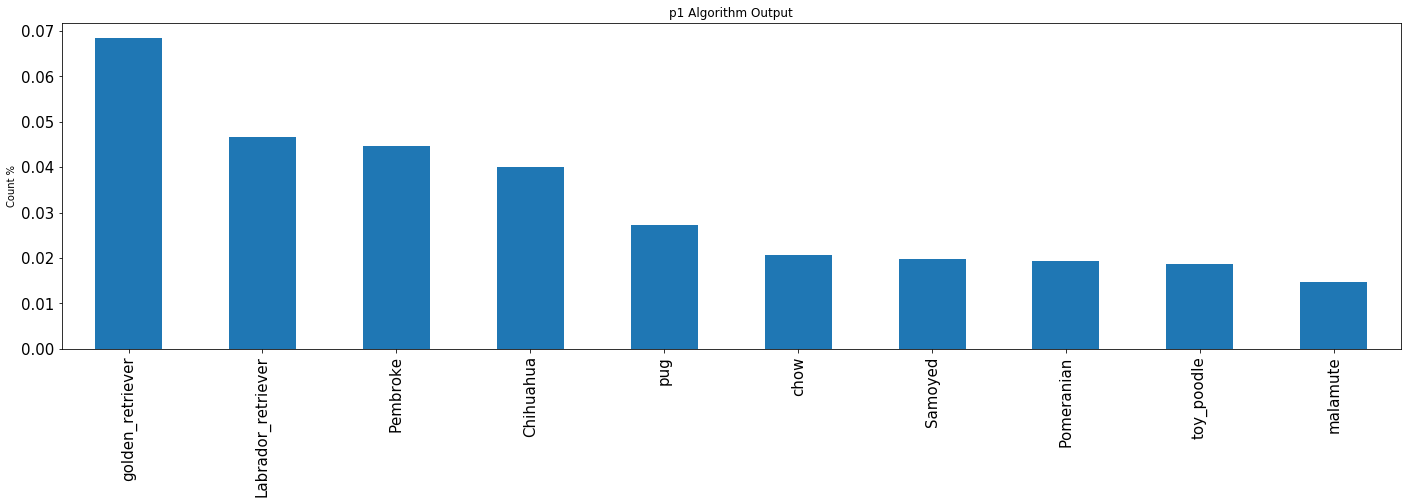

In [204]:
plot_algo('p1')

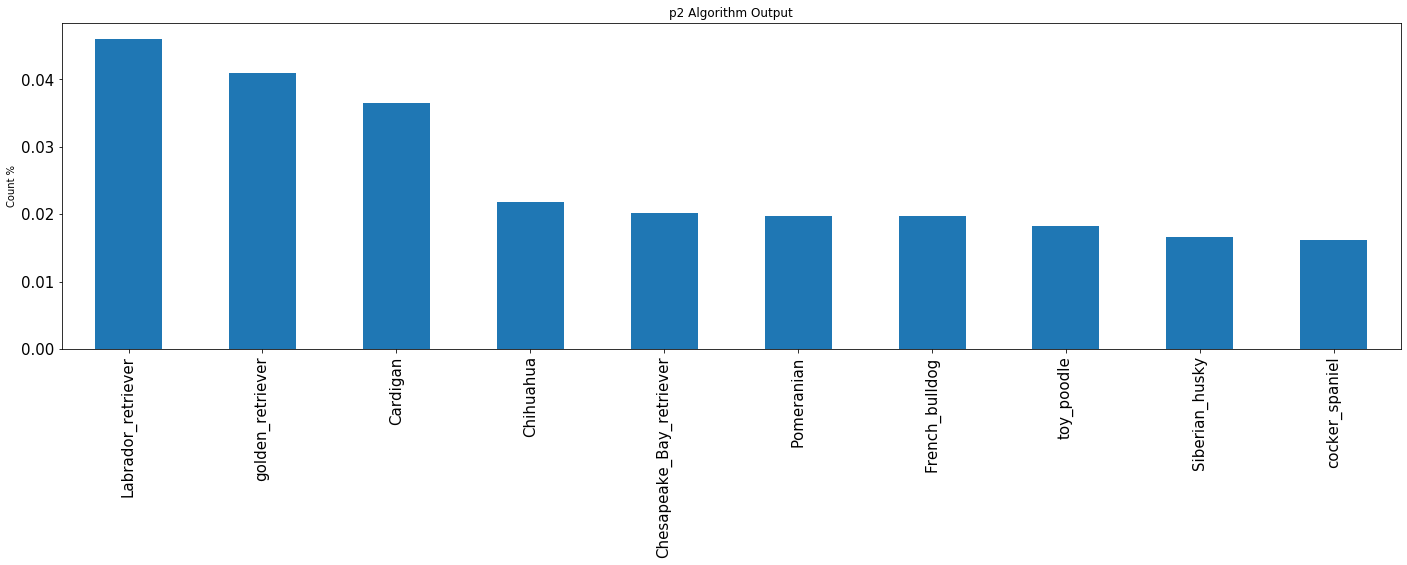

In [205]:
plot_algo('p2')

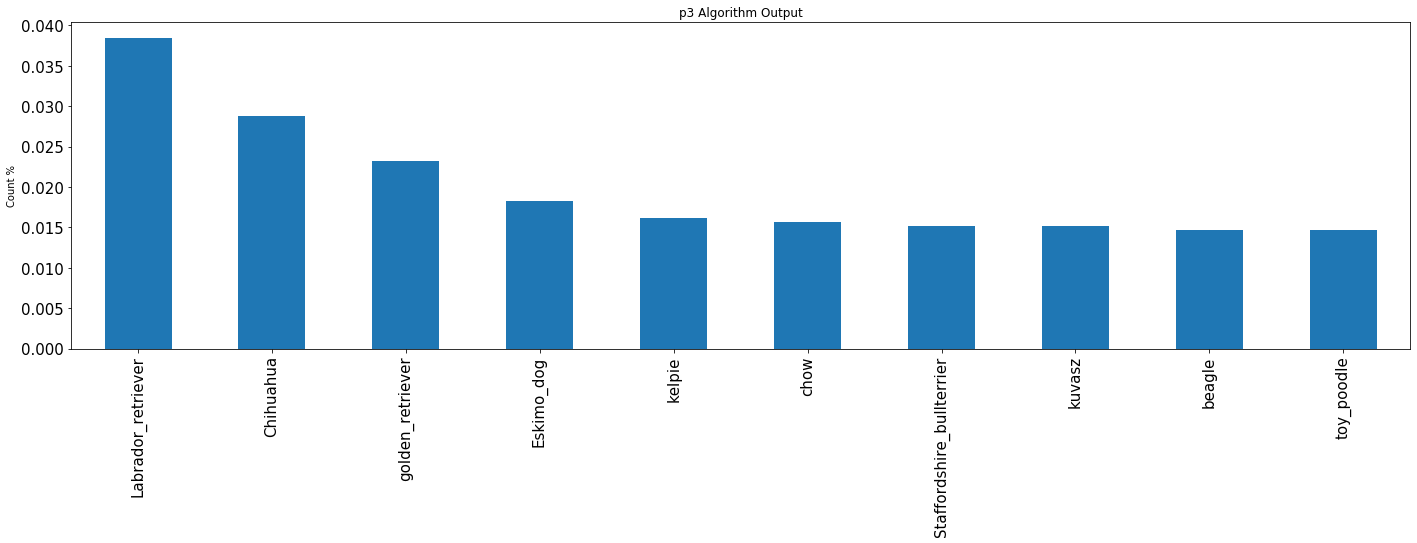

In [206]:
plot_algo('p3')

Most of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

To get the top rating_numerator values based on the count->

In [207]:
def rating(nd):
    cnt = df_clean['rating_'+nd].value_counts().head(20)
    sns.barplot(y=cnt.index, x=cnt.values, alpha=0.8)
    plt.xlabel('Rating '+nd+' Count', fontsize=12)
    plt.ylabel('Rating '+nd+' Scale', fontsize=12)
    plt.title('Rating '+nd+' vs Count', fontsize=15)
    plt.show()

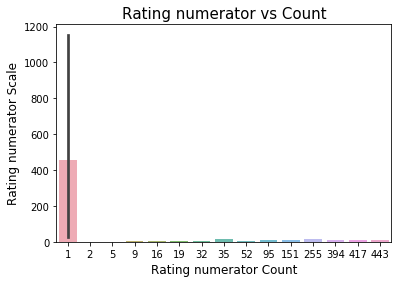

In [208]:
rating('numerator')

Majority of the ratings are around 10

In [209]:
df_clean[df_clean['rating_denominator'] < 10].shape

(2, 30)

In [210]:
df_clean[df_clean['rating_denominator'] > 10].shape

(16, 30)

To get the top rating_denominator values based on the count->

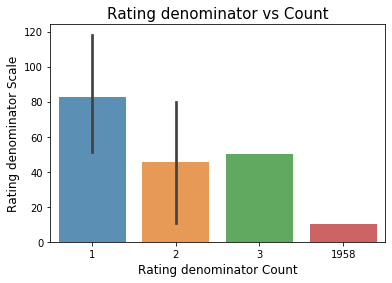

In [211]:
rating('denominator')

* There must be rating denominator with 10, but sometimes users are rated with < 10 and > 10.
* So, 1958 are rated on 10. 

The Top dog name values ->

In [212]:
def dog(n):
    cnt = df_clean[n].value_counts().head(10)
    sns.barplot(y=cnt.index, x=cnt.values, alpha=0.8)
    plt.xlabel(n+' Count')
    plt.ylabel(n+' of the Dog')
    plt.title(n+" w.r.t Count")
    plt.show()

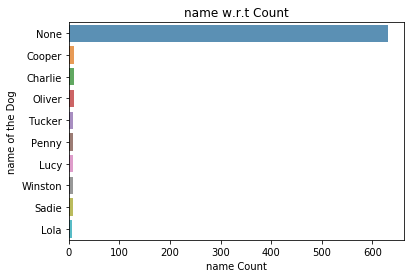

In [213]:
dog('name')

Majority of the Dog names are "None". This was set by us for the inappropriate names.

Dog_stage values based on the count ->

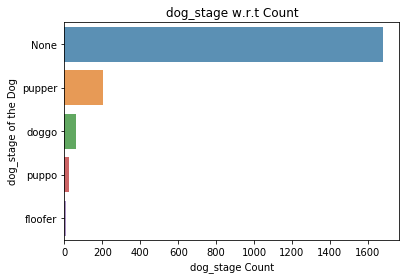

In [214]:
dog('dog_stage')

Majority of the Dog stages are none and second highest is pupper.